#Databricks

Databricks is a cloud-based platform designed to help organizations process, analyze, and gain insights from big data using a unified analytics approach. It combines data engineering, data science, machine learning, and business analytics into a single collaborative workspace.

Sitting at the heart of Databricks is the engine that does data processing: an open-source technology called Apache Spark.

To do the data processing a cluster of computers is needed. Spinning up, configuring, altering and maintaining a cluster is a pain. Also, installing, configuring, optimising and maintaining Spark is a pain too.

Databricks allows you to define what you want in your clusters, and then looks after the rest. Clusters only come into existence when you need them and disappear when you’re not using them. Spark is already installed and configured. It even auto-scales the clusters within your predefined limits, meaning it can add or subtract nodes as the scale of the processing increases or decreases. It all means you can focus on your data processing and therefore generating value, rather than managing supporting the infrastructure.

**Why Databricks**

There were some challenges in normal data platforms that Databricks solves.
1. Normal solutions used different tools for data warehousing, ingestion/ETL, orchestration, governance, BI tool for reporting etc. These tools must be integrated properly for the data platform to work well. This was a big challenge.
  Databricks provides a unified solution, with all the tools required for a data platform bunced together in the same data platform.

2. In case proprietary solutions are used, the challenge of vendor lockings may arise. Databricks uses open source solutions, thereby avoiding the situation of vendor locking.

3. Data duplicacy/redundancy: In a normal data platform, the data for ETL/AIML may be stored in data lake while BI tools might be referring to a different data warehouse. This essentially results in the same set of data to be present in two different places, owned by different owners. Databricks enables us to use data lakehouse which can be used by both ETL and analytics.

![databricksimage.png](./databricksimage.png "databricksimage.png")

[](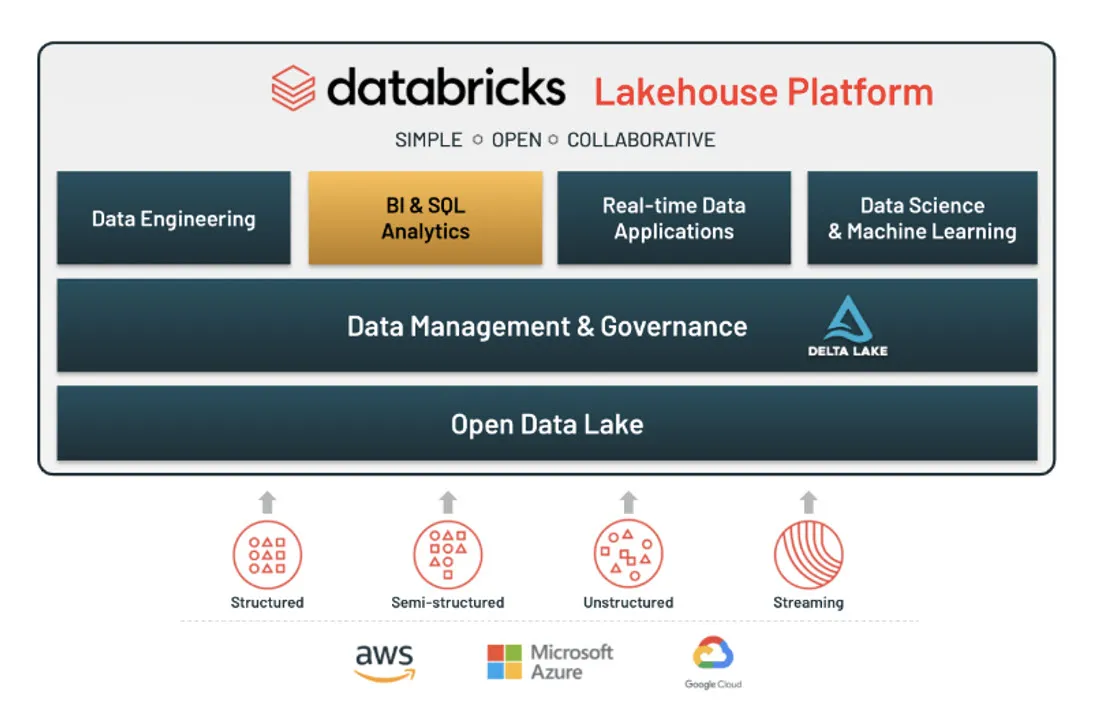)

**Databricks Catalogs**

Databricks has two types of metastores:

1. **Hive Metastore:** The default metadata store for databricks. It stores database schemas and table metadata such as - the schema, the paths of the underlying data in the Data Lake, and the format, like - parquet or delta, in which the underlying data of the created Tables is stored in the Data Lake etc.; but is limited to a single workspace.

2. **Unity Catalog:** A centralized governance solution for managing metadata across multiple Azure Databricks workspaces. It provides lineage tracking, role-based access control (RBAC) and audit logging. It supports data lake, delta lake and, external storage system.

The Unity Catalog is only available in the Premium pricing tier.

![metastore.png](./metastore.png "metastore.png")

![catalog.png](./catalog.png "catalog.png")

1. Metastore -

Similar to the Hive Metastore, the Unity Catalog also works on the Metastore. The Metastore for the Unity Catalog has to be created manually.

Because of this Metastore, the Unity Catalog has a Centralized Metadata layer, which can be shared across multiple Databricks Workspaces.

The data itself, Data Lineage, Audit Logs and everything about the data will be captured and stored in the Metastore of the Unity Catalog.

2. User Management -

If a specific set of Users, a specific set of Groups, or, a Service Principle from the Azure Active Directory has the permission to access a specific Databricks Workspace in a lakehouse project, then those specific set of Users, specific set of Groups, or, the Service Principle can be imported into the User Management of the Unity Catalog for that lakehouse project.

**Hierarchy in Unity Catalog**

A Unity Catalog Metastore exposes a three-level namespace, i.e., catalog.schema.table, that organizes the data.

1. **Catalog:** It is a logical grouping of schemas. It allows multi-workspace governance under a single umbrella.

2. **Schema:** A collection of tables and views inside a catalog.

3. **Tables:** Unity Catalog supports Managed (Databricks managed storage) and External (Stored in ADLS or other sources) tables.



**Points to remember**

* To configure the Unity Catalog, the User must be a Global Account Admin.

* There can be only one Unity Catalog per Region.

* Each Databricks Workspace can be attached to only one Unity Catalog Metastore.

* One Unity Catalog Metastore can be attached to multiple Databricks Workspaces.

* It is not possible to assign a Unity Catalog, which is created in the Region-A, to the Databricks Workspace, which is created in the Region-B.

**Delta Tables**

A Delta table is essentially a versioned version of a data lake table that is stored as a collection of small data files in a hierarchical file system, rather than as a single monolithic file. This allows for fast, incremental processing and enables you to keep track of changes to the data over time.

Delta tables also offer a number of other advantages over traditional data lake tables, such as:

**ACID transactions:** Delta tables support ACID transactions, which allow you to update, delete, or insert data in a safe and consistent manner, even when multiple users are accessing the same data simultaneously.

**Data versioning:** Delta tables automatically version each change to the data, so you can roll back to any previous version if necessary.

**Data management:** Delta tables provide a number of built-in data management features, such as automatic data pruning and compaction, which help you keep your data lake organized and optimized for performance.

**Efficient queries:** Delta tables are optimized for fast querying, even over large datasets. They also support predicate pushdown, which allows you to filter data at the storage layer before it is loaded into memory, making your queries faster and more efficient.


![deltatable.png](./deltatable.png "deltatable.png")

**_delta_log/ Directory**
This is the transaction log that makes Delta Lake ACID-compliant. It contains JSON and Parquet files. Each file represents a transaction commit (append, update, delete).

Delta log maintains:

* File-level metadata
* Schema changes
* Partition info
* Operation history

**Data Files**
Stored as Parquet files:

part-*.snappy.parquet — These contain your actual table data.

Data files are often organized into partitions if the table is partitioned. E.g.,
![parquetfile.png](./parquetfile.png "parquetfile.png")

**Optional Hidden Files**

These are sometimes seen in cloud storage:

* _SUCCESS or _started (in managed environments like Databricks)

* .crc files (if using HDFS or Hadoop clients)

* Temporary files like ._committed_ during writes

**Time Travel**

"Time travel" in Databricks (specifically in Delta Lake) refers to the ability to access previous versions of a Delta table. This feature is extremely useful for:

* Data auditing

* Debugging

* Reproducing experiments

* Rolling back accidental changes

**How Delta Lake Time Travel Works**

Delta Lake maintains a transaction log (_delta_log) that records all changes to the table. Each commit (e.g., INSERT, UPDATE) is given a version number or timestamp.

You can query previous versions of a Delta table using:

1. By version number
2. By timestamp


**How Long is Time Travel Available?**

This depends on retention settings.

By default, Delta Lake keeps data and logs for 30 days.

You can configure this using table properties:

* 'delta.logRetentionDuration'
* 'delta.deletedFileRetentionDuration'


**OPTIMIZE Command**

Goal: Reduce the number of small files.

Whenever any transaction is performed on a delta table, a new file gets created. Some of these files may be very small in size. Over a period of time, the number of files containing data for a particular delta table becomes large and reading data from multiple files becomes an overhead. **OPTIMIZE** helps to reduce the number of files by merging smaller files into fewer large ones.

By default, the OPTIMIZE command in Delta Lake tries to produce files around 1 GB in size.

You can override the target file size using a configuration setting.


In [0]:
SET spark.databricks.delta.optimize.maxFileSize = 1342177280  # 1.25 GB


**NOTE:** Although OPTIMIZE reduces the number of files to be read, still the whole dataset is read during read operations. This is because there is no ordering, and data from multiple files is randomly merged.



---



**Z-ordering**

Goal: Speed up queries by colocating data with similar values (data skipping).

Z-ordering is a technique used to co-locate data with similar values in the same set of data files. When the data files are written for a delta table, the statistics like min, max and count are added in the stats field. These statistics help in data skipping when querying the delta table.

* By default, the statistics of the first 32 columns of the dataset are collected. Although using the configuration **delta.dataSkippingNumIndexedCols**, this number can be changed, it can affect the write performance, especially for long string columns. So, it is advisable to keep the long string columns to the end of the schema.

* Z-ordering helps to improve the performance of the queries containing WHERE clause.

* It is well-suited for the columns with high cardinality.

* Multiple columns can be used for z-ordering, but the effectiveness of data skipping decreases with each additional field.



---



**VACUUM**

Goal: Remove obsolete files to reduce storage and list overhead.

The VACUUM command deletes the data files that are no longer required by a delta table and are older than the default retention period. The default retention period is 7 days, but it can be changed using the configuration “delta.deletedFileRetentionDuration”.



In [0]:
%sql
use adb_practice

In [0]:
# Delta Table creating using PySpark

from delta.tables import *
DeltaTable.createIfNotExists(spark)\
    .tableName("bronze.studentIfnotExist")\
    .addColumn("studentId","LONG")\
    .addColumn("StudentName","STRING")\
    .addColumn("DeptNo","INTEGER")\
    .addColumn("Salary","DECIMAL(18,4)")\
    .property("description","table for student")\
    .location('dbfs:/mnt/landing/student')\
    .partitionedBy("DeptNo")\
    .execute()


In [0]:
# Delta Table creating using Spark SQL

%sql
CREATE TABLE bronze.student_sparksql (
  studentId LONG,
  StudentName STRING,
  DeptNo INTEGER,
  Salary DECIMAL(18, 4)
)
USING DELTA


In [0]:
# Delta Table creating using Dataframe

student_data = [(1,"Pubudu",10,10000),
                (2,"Suranga",20,20000),
                (3,"Dewagama",30,30000)
]

student_schema = ["studentId","StudentName","DeptNo","Salary"]

df = spark.createDataFrame(data=student_data, schema = student_schema)

display(df)

df.write.format("delta").saveAsTable("Student_DF_Table")


In [0]:
# Display data of Delta Tables

%sql
select * from Student_DF_Table


In [0]:
df = spark.sql("select * from bronze.Student_DF_Table")
display(df)

In [0]:
# Describe Delta Tables

%sql
DESCRIBE Student_DF_Table


In [0]:
%sql
DESCRIBE DETAIL Student_DF_Table

In [0]:
# Drop Delta Tables

%sql
DROP TABLE IF EXISTS Student_DF_Table;


In [0]:
# List Delta Tables
%sql
SHOW TABLES from bronze;


In [0]:
# Rename the columns of the Delta Tables
spark.read.table("bronze.Student_DF_Table")\
    .withColumnRenamed("StudentName","Name")\
    .withColumnRenamed("Salary","Monthly_Salary")\
    .write.format("delta").mode("overwrite").option("overwriteSchema",True).saveAsTable("default.Student_DF_Table")

df = spark.sql("select * from bronze.Student_DF_Table")
display(df)


In [0]:
# Time travel and Roll back delta table to previous version
%sql
DESCRIBE HISTORY default.Student_DF_Table


In [0]:
%sql
delete from bronze.Student_DF_Table where studentId = 1

In [0]:
%sql
DESCRIBE HISTORY bronze.Student_DF_Table

In [0]:
%sql
select * from bronze.Student_DF_Table VERSION AS OF 1;

In [0]:
%sql
select * from bronze.Student_DF_Table TIMESTAMP AS OF '2025-06-20T10:00:00.000Z';

In [0]:
%sql
RESTORE TABLE bronze.Student_DF_Table TO VERSION AS OF 1

In [0]:
df = spark.sql("select * from bronze.Student_DF_Table")
display(df)

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand, expr



# Sample data
data = [(i, f'product_{i % 5}', f'region_{i % 3}', int(1000 + i*2)) for i in range(100)]
columns = ["order_id", "product_id", "region", "amount"]

df = spark.createDataFrame(data, columns)

# Save as Delta table
df.write.format("delta").mode("overwrite").saveAsTable("bronze.sales_data")


In [0]:
spark.sql("select * from bronze.sales_data").show()

In [0]:
%sql

OPTIMIZE bronze.sales_data;


In [0]:
%sql

OPTIMIZE bronze.sales_data
ZORDER BY (region, product_id)

In [0]:
%sql

VACUUM bronze.sales_data RETAIN 168 HOURS;


🔍 What Is Liquid Clustering?
Liquid Clustering dynamically clusters data without fixed partitions or manual OPTIMIZE.

✅ Key Features:
No need to specify partitions at table creation.

Automatically re-clusters data during write operations.

Supports multi-dimensional clustering (like ZORDER), but dynamically.

Works incrementally, saving compute over full OPTIMIZE.

🆚 Liquid Clustering vs ZORDER

| Feature            | ZORDER                          | Liquid Clustering                                |
| ------------------ | ------------------------------- | ------------------------------------------------ |
| Manual trigger     | Yes (`OPTIMIZE`)                | No (automatic)                                   |
| Partition required | No                              | No                                               |
| Write-time impact  | No                              | Slightly higher write cost                       |
| Maintenance        | Manual (schedule OPTIMIZE)      | Minimal                                          |
| Best for           | Append-only or static workloads | Streaming, high-churn, frequently updated tables |



In [0]:
%sql
CREATE TABLE IF NOT EXISTS bronze.customer_orders (
  order_id STRING,
  customer_id STRING,
  order_date DATE,
  region STRING,
  amount DOUBLE
)
USING DELTA
TBLPROPERTIES (
  'delta.autoOptimize.optimizeWrite' = 'true',
  'delta.autoOptimize.autoCompact' = 'true',
  'delta.feature.clustering' = 'supported',
  'delta.clustering.columns' = 'region, order_date'
)
CLUSTER BY (region);